# Using the file melb_data.csv load it into a pandas data frame
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('melb_data.csv')

## How many unique suburbs are there?

In [3]:
df['Suburb'].nunique()

314

## How many unique properties are there?

In [4]:
# dropping data that has the same suburb and address, resulting in unique addresses
df_unique = df.drop_duplicates(['Suburb', 'Address'],keep= 'first')
df_unique['Address'].count()

13466

## What is the mean price of a property in the Kensington suburb?

In [5]:
# using df with unique values to calculate the average
ken_prop = df.loc[df['Suburb'] == 'Kensington', 'Price'].mean()
print(ken_prop)

831667.4358974359


## What percentage of properties contain a YearBuilt value?

In [6]:
#1 - percentage of properties with no yearbuilt value * 100
null_entries = df['YearBuilt'].isnull().sum()
total_entries = df['YearBuilt'].count()
percentage = (1 - (null_entries)/(total_entries)) * 100
print(str(percentage) + '%')

34.48696076041921%


## Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph. 

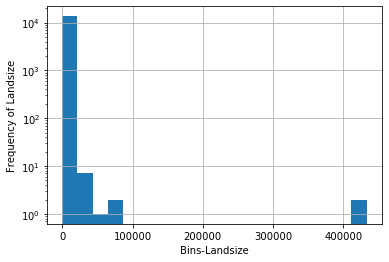

In [7]:
df['Landsize'].hist(bins = 20, log = True)
plt.xlabel('Bins-Landsize')
plt.ylabel('Frequency of Landsize',fontsize=10)
plt.show()
# majority of the landsizes lie between 0 and 100,000. There exists no property that is between 100,000 and 400,000. 
# it may be on interest to remove the outlier and focus on where most of the data is aggregated. 

## Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

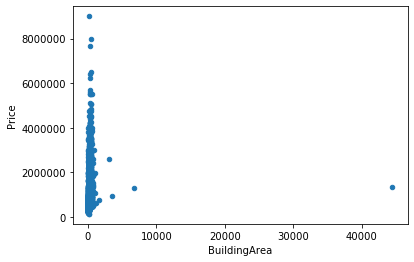

In [8]:
#creating new df with valid building areas
bA_df = df[df['BuildingArea'].notnull()]
bA_df.plot.scatter('BuildingArea', 'Price')
plt.show()

## List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

In [9]:
sellerg_freq = df['SellerG'].value_counts(ascending = False)
total_sellerg = sellerg_freq.sum()
percent_listed = (sellerg_freq/total_sellerg) * 100
print("Top 10 SellerG: \n" + str(sellerg_freq.head(11)))
print("\nTop 10 SellerG Percentages: \n" + str(percent_listed.head(11)))



Top 10 SellerG: 
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Marshall          659
Buxton            632
Biggin            393
Brad              342
Fletchers         301
Woodards          301
Name: SellerG, dtype: int64

Top 10 SellerG Percentages: 
Nelson           11.524300
Jellis            9.690722
hockingstuart     8.593520
Barry             7.444772
Ray               5.162003
Marshall          4.852725
Buxton            4.653903
Biggin            2.893962
Brad              2.518409
Fletchers         2.216495
Woodards          2.216495
Name: SellerG, dtype: float64


## Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement

In [14]:
df_copy = df.copy()
for index, row in df_copy.iterrows():
    df_copy.loc[index, 'Rooms'] += 1
df_copy.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,3.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,3.0,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,4.0,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,4.0,h,850000.0,PI,Biggin,4/3/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,5.0,h,1600000.0,VB,Nelson,4/6/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
df_copy = df.copy()
df_copy.Rooms += 1
#df_copy.head(5)

## What is the Address of the earliest built house in the data set?

In [12]:
df.iloc[df['YearBuilt'].idxmin()]['Address']

'5 Armstrong St'

## Save a file 
The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the counsil person.  Export the file with only the allowed columns, and do not write and index column.

In [13]:
df.to_csv('council_data.csv', columns = ['Suburb', 'Price', 'Date'], index = False)